In [1]:
import numpy as np
import pandas as pd

# toolz package
import mlbstatscraping as mss


In [2]:

# set up the parameters
analysis_year         = 2026 # what year are we projecting?
savedate              = '022426' # arbitrary tag for saving files
nclusters             = 12 # how many archetypes are there?
weight_distribution   = [0.5, 0.3, 0.13, 0.07] # how much do the past four years contribute?
regression_factor     = 0.8 # how much regression to the mean?
err_regression_factor = 0.8 # how much uncertainty in the regression to the mean?

year_weights = dict()
for year in range(analysis_year-1,analysis_year-5,-1):
    year_weights[year] = weight_distribution[analysis_year-year-1]



In [3]:
years = range(analysis_year-4,analysis_year)
for year in years:
    try:
        HittingDF = pd.read_csv('data/AllHitting_{}.csv'.format(year))
    except FileNotFoundError:
        HittingDF = mss.get_fangraphs_data('hitting',[year])
        HittingDF.to_csv('data/AllHitting_{}.csv'.format(year),index=False)
    lastyeardf = HittingDF
    if year == analysis_year-4:
        df = HittingDF
    else:
        df = pd.concat([df,HittingDF])



In [4]:
# use 12 clusters
import src.makeclusters as makeclusters
year_df,stereotype_df,dfnew,hitter_cluster_centroid_df = makeclusters.create_hitting_clusters(df,nclusters,years,savedir='predictions/{}/all/'.format(analysis_year))
pls = np.unique(np.array(list(df['Name'])))



/Users/mpetersen/FantasyBaseball/mlb-player-predictions/src/makeclusters.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,('{0}.Normalize'.format(stat))] = 100.*(df.loc[:,(stat)])/df.loc[:,(denominator)]
/Users/mpetersen/FantasyBaseball/mlb-player-predictions/src/makeclusters.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,('{0}.Normalize'.format(stat))] = 100.*(df.loc[:,(stat)]-df.loc[:,('HR')])/df.loc[:,(denominator)]
/Users/mpetersen/FantasyBaseball/mlb-player-predictions/src/m

14     174.0
15     199.0
16      72.0
17      53.0
20     178.0
       ...  
590     13.0
591     22.0
603     16.0
604     18.0
612     12.0
Name: H, Length: 1842, dtype: float64


/Users/mpetersen/FantasyBaseball/mlb-player-predictions/src/makeclusters.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters'] = pd.Series(predict, index=df.index)
/Users/mpetersen/FantasyBaseball/mlb-player-predictions/src/makeclusters.py:115: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  idx = short_hitter_df.groupby(['Clusters'])['Centroid Diff'].transform(min) == short_hitter_df['Centroid Diff']


In [5]:
# get plate appearances
import src.plateappearances as plateappearances
PADict = plateappearances.get_plate_appearances(pls)
PADict = plateappearances.forecast_600(pls)



['Dansby Swanson' 'Vladimir Guerrero Jr.' 'Freddie Freeman' 'Matt Olson'
 'Jose Abreu' 'Trea Turner' 'Adam Frazier' 'Marcus Semien' 'Jose Ramirez'
 'Manny Machado' 'Pete Alonso' 'Paul Goldschmidt' 'Whit Merrifield'
 'Tommy Edman' 'Ian Happ' 'Austin Riley' 'Jake Cronenworth'
 'Isiah Kiner-Falefa' 'Bryan Reynolds' 'Josh Bell' 'Rafael Devers'
 'Bobby Witt Jr.' 'Carlos Santana' 'Eugenio Suarez' 'Francisco Lindor'
 'J.P. Crawford' 'Kyle Tucker' 'Xander Bogaerts' 'Charlie Blackmon'
 'Yuli Gurriel' 'Cedric Mullins II' 'Trent Grisham' 'Ryan McMahon'
 'Nicky Lopez' 'Steven Kwan' 'Alex Verdugo' 'Carlos Correa' 'Mark Canha'
 'Javier Baez' 'Jurickson Profar' 'Max Muncy' 'Shohei Ohtani'
 'Randal Grichuk' 'Wilmer Flores' 'Fernando Tatis Jr.' 'Nolan Arenado'
 'Trey Mancini' 'Nick Castellanos' 'J.D. Martinez' 'Juan Soto'
 'Andrew McCutchen' 'Mike Yastrzemski' 'Joey Gallo' 'Christian Yelich'
 'Anthony Rizzo' 'Christian Walker' 'Eduardo Escobar' 'David Peralta'
 'Kyle Schwarber' 'Willy Adames' 'Robbie G

In [6]:
PADict

{'A.J. Ladwig': 600.0,
 'A.J. Minter': 600.0,
 'A.J. Pollock': 600.0,
 'A.J. Puk': 600.0,
 'Aaron Brooks': 600.0,
 'Aaron Bummer': 600.0,
 'Aaron Civale': 600.0,
 'Aaron Hicks': 600.0,
 'Aaron Judge': 600.0,
 'Aaron Loup': 600.0,
 'Aaron Nola': 600.0,
 'Aaron Sanchez': 600.0,
 'Aaron Schunk': 600.0,
 'Abraham Almonte': 600.0,
 'Abraham Toro': 600.0,
 'Adael Amador': 600.0,
 'Adalberto Mondesi': 600.0,
 'Adam Cimber': 600.0,
 'Adam Duvall': 600.0,
 'Adam Engel': 600.0,
 'Adam Frazier': 600.0,
 'Adam Haseley': 600.0,
 'Adam Kolarek': 600.0,
 'Adam Ottavino': 600.0,
 'Adam Wainwright': 600.0,
 'Adbert Alzolay': 600.0,
 'Addison Barger': 600.0,
 'Adley Rutschman': 600.0,
 'Adolis Garcia': 600.0,
 'Adrian Del Castillo': 600.0,
 'Adrian Houser': 600.0,
 'Adrian Morejon': 600.0,
 'Adrian Sampson': 600.0,
 'Agustin Ramirez': 600.0,
 'Akil Baddoo': 600.0,
 'Alan Busenitz': 600.0,
 'Alan Rangel': 600.0,
 'Alan Roden': 600.0,
 'Alan Trejo': 600.0,
 'Albert Abreu': 600.0,
 'Albert Almora Jr.': 600

In [7]:
PADF = mss.get_fantasypros_projections('hitters',preseason=True)
PADF['PA'] = PADF['AB'] + PADF['BB']
for plr in PADict.keys():
    try:
        paentry = PADF['PA'][PADF['Player']==plr+' '].values[0]
        PADict[plr] = int(paentry)
        print(paentry)
    except:
        PADict[plr] = 10


630
35
55
107
21
184
492
552
553
188
488
37
170
14
16
558
565
472
80
403
630
161
107
47
217
80
13
40
222
16
250
539
485
97
319
528
66
185
562
264
118
18
448
16
31
452
130
315
618
13
70
429
142
517
31
193
23
18
178
38
218
14
284
52
612
434
34
14
650
28
478
29
55
524
459
611
195
460
531
53
632
551
432
154
17
47
12
30
12
44
628
359
536
38
42
618
392
611
160
214
568
12
517
594
620
503
33
416
539
138
403
353
357
33
379
370
31
228
31
549
35
142
28
446
95
523
147
69
78
420
166
555
574
332
18
169
590
184
233
22
365
549
483
489
30
32
436
215
601
41
526
14
85
109
48
193
217
28
219
319
615
177
14
529
19
198
190
13
15
316
15
528
14
346
45
93
404
15
401
23
98
63
508
15
174
125
29
72
35
392
65
550
96
14
417
236
375
19
14
26
103
80
643
35
15
83
29
184
19
132
547
92
19
590
436
193
276
616
635
12
419
606
619
408
423
432
14
54
337
33
152
446
458
574
363
626
403
84
632
16
287
45
321
647
29
15
469
252
18
597
266
331
50
248
540
80
169
629
97
405
474
188
527
127
12
25
585
461
307
481
79
12
66
12
624
482
596

In [8]:
PADict['Zach Neto']

604

In [9]:
# add optional age adjustments
import src.ageregression as ageregression
year_weights_penalty, age_penalty_slope, age_pivot = ageregression.return_age_factors()


In [10]:
pls

array(['A.J. Ladwig', 'A.J. Minter', 'A.J. Pollock', ..., 'Zack Short',
       'Zack Weiss', 'Zack Wheeler'], dtype='<U28')

In [11]:
# set up the projections
import src.projectplayers as projectplayers


printfile = 'predictions/{}/all/hitter_predictions_'.format(analysis_year)+savedate+'.dat'

ShouldProject = projectplayers.predict_players(pls,years,printfile,dict(),PADict,dfnew,hitter_cluster_centroid_df,year_weights,year_weights_penalty,regression_factor,err_regression_factor,age_penalty_slope,age_pivot)



In [12]:
A = np.genfromtxt(printfile,\

                  dtype={'names':       ("Name", "HR", "eHR","pHR",\
                                         "H","eH","pH",\
                                         "AB", "eAB","pAB",\
                                         "SB","eSB","pSB",\
                                         "RBI","eRBI","pRBI",\
                                         "R","eR","pR",\
                                        "PA","Afac"),\
                             'formats': ('S20',  'f4',   'f4','f4',\
                                         'f4',  'f4',  'f4','f4','f4','f4',\
                                         'f4',  'f4',  'f4',  'f4','f4','f4',\
                                         'f4',  'f4',  'f4', 'f4','f4')},\
                 delimiter=',')



In [13]:
import src.rankandprint as rprint

# rank players
totrank,sumrank = rprint.roto_rank(A)

# create error bands
fantasy_stats=['HR', 'H', 'AB', 'SB', 'RBI','R']
xvals = np.linspace(0.,120.,1000)
LDict,MDict,HDict = rprint.make_mid_min_max(A,totrank,fantasy_stats,xvals)

# make html table
printfile = 'predictions/{}/all/batter_predictions_{}.tbl'.format(analysis_year,savedate)
rprint.print_html_ranks(printfile,A,totrank,LDict,MDict,HDict)

# make easier to read csv
printfile = 'predictions/{}/all/batter_predictions_{}.csv'.format(analysis_year,savedate)
rprint.print_csv_ranks(printfile,A,totrank,sumrank,LDict,MDict,HDict)


In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [15]:
df.keys()

Index(['#', 'Name', 'Team', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR', 'R',
       'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'Year'],
      dtype='object')

In [16]:
SDF = pd.read_csv('/Users/mpetersen/FantasyBaseball/mlb-player-predictions/predictions/2026/all/2026Stereotype_Players_starters12.csv')
SDF

,Clusters,Name,Year,HR,H,AB,SB,RBI,R,Value Cluster
0,0,Ryan Mountcastle,2024.0,13.0,128.0,473.0,3.0,63.0,54.0,8.0
1,1,Pavin Smith,2025.0,8.0,63.0,244.0,2.0,28.0,36.0,4.0
2,2,Trevor Larnach,2025.0,17.0,126.0,503.0,4.0,60.0,62.0,5.0
3,3,Adolis Garcia,2023.0,39.0,136.0,555.0,9.0,107.0,108.0,11.0
4,4,Manny Machado,2023.0,30.0,140.0,543.0,3.0,91.0,75.0,10.0
5,5,Nick Ahmed,2024.0,2.0,48.0,210.0,2.0,17.0,20.0,2.0
6,6,Lane Thomas,2023.0,28.0,168.0,628.0,20.0,86.0,101.0,12.0
7,7,Bo Naylor,2025.0,14.0,70.0,359.0,1.0,47.0,46.0,3.0
8,8,Josh VanMeter,2022.0,3.0,32.0,171.0,4.0,14.0,15.0,1.0
9,9,Jose Azocar,2023.0,2.0,21.0,91.0,8.0,9.0,16.0,9.0


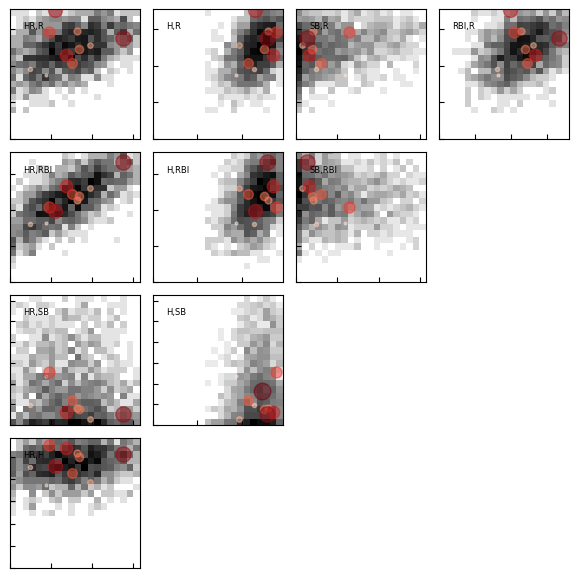

In [17]:


cats = ['HR','H','SB','RBI','R']
DF = df[df['PA']>100]

fig = plt.figure(figsize=(10,10))

for ix,cat1 in enumerate(cats):
    for iy,cat2 in enumerate(cats):
        if ix<iy:
            x = (DF[cat1].values)/(DF['AB'].values)
            y = (DF[cat2].values)/(DF['AB'].values)


            bins = [20, 20]
            range_ = [[np.nanmin(x),np.nanmax(x)], [np.nanmin(y),np.nanmax(y)]]
            range_ = [[0.,np.nanpercentile(x,95.)], [0.,np.nanpercentile(y,95.)]]
            H0, xedges, yedges = np.histogram2d(x, y, bins=bins, range=range_)

            ax = fig.add_axes([0.1+ix*0.143,0.1+iy*0.143,0.13,0.13])
            ax.imshow(np.log10(H0.T+1), origin='lower',
                    extent=(xedges[0], xedges[-1], yedges[0], yedges[-1]),
                    aspect='auto', cmap=cm.Greys)
            
            for i in range(0,12):
                srow = SDF[SDF['Value Cluster']==i]
                scat1 = (srow[cat1].values)/(srow['AB'].values)
                scat2 = (srow[cat2].values)/(srow['AB'].values)
                ax.plot(scat1,scat2,marker='o',color=cm.Reds(i/11.,1),markersize=1*(i+1),alpha=0.5)
            
            ax.axis([range_[0][0],range_[0][1],range_[1][0],range_[1][1]])
            ax.text(0.1,0.85,'{},{}'.format(cat1,cat2),transform=ax.transAxes,fontsize=6)
            ax.set_xticklabels(())
            ax.set_yticklabels(())
            ax.tick_params(axis='both', which='major', direction='in', labelsize=6)


In [18]:
Proj = pd.read_csv('/Users/mpetersen/FantasyBaseball/mlb-player-predictions/predictions/2026/all/batter_predictions_120525.csv')
print([x for x in Proj['Name'][0:10]])

['Shohei Ohtani ', 'Jose Ramirez ', 'Byron Buxton ', 'Bobby Witt Jr. ', 'Aaron Judge ', 'Christian Yelich ', 'Jazz Chisholm Jr. ', 'Francisco Lindor ', 'Kyle Tucker ', 'Julio Rodriguez ']


In [19]:
LY = pd.read_csv('data/AllHitting_2025.csv')
TY = pd.read_csv('predictions/2026/all/batter_predictions_'+savedate+'.csv')
IPDF = mss.get_fantasypros_projections('hitters',preseason=True)


# tag last year with year
LY = LY.add_suffix('2025')
LY = LY.rename(columns={'Name2025': 'Name'})

# tag expert projections
IPDF = IPDF.add_suffix('expert')
IPDF = IPDF.rename(columns={'Nameexpert': 'Name'})

IPDF['Name'] = IPDF['Playerexpert'].str.rstrip()
TY['Name'] = TY['Name'].str.rstrip()


In [20]:
RDF = mss.get_fantasypros_ranks()

# tag expert projections
RDF = RDF.add_suffix('draft')
RDF['Name'] = RDF['player_namedraft'].str.rstrip()

In [21]:
CP = pd.merge(IPDF,TY,on='Name')
CP = pd.merge(CP,RDF,on='Name')
CP

,Playerexpert,ABexpert,Rexpert,HRexpert,RBIexpert,SBexpert,AVGexpert,OBPexpert,Hexpert,2Bexpert,...,has_imagedraft,player_espn_positionsdraft,player_cbs_positionsdraft,player_page_urldraft,rank_ecrdraft,rank_mindraft,rank_maxdraft,rank_avedraft,rank_stddraft,pos_rankdraft
0,Shohei Ohtani,568,123,47,111,24,0.283,0.382,161,29,...,1,"DH,SP","SP,DH",https://www.fantasypros.com/mlb/players/shohei...,1,1,2,1.08,0.24,DH1
1,Aaron Judge,518,109,46,113,9,0.290,0.417,150,26,...,1,"RF,DH","RF,DH",https://www.fantasypros.com/mlb/players/aaron-...,2,1,3,1.81,0.39,OF1
2,Bobby Witt Jr.,601,101,28,92,34,0.292,0.345,176,38,...,1,SS,SS,https://www.fantasypros.com/mlb/players/bobby-...,3,3,5,3.19,0.39,SS1
3,Juan Soto,540,109,37,98,20,0.273,0.408,147,25,...,1,RF,RF,https://www.fantasypros.com/mlb/players/juan-s...,4,3,6,4.06,0.66,OF2
4,Ronald Acuna Jr.,541,107,29,81,25,0.283,0.383,153,25,...,1,RF,RF,https://www.fantasypros.com/mlb/players/ronald...,6,5,12,6.75,1.79,OF3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Jarred Kelenic,96,11,3,10,2,0.215,0.278,21,5,...,1,RF,RF,https://www.fantasypros.com/mlb/players/jarred...,1022,833,1391,"1,112.00",279.00,OF151
399,Korey Lee,98,11,3,10,1,0.220,0.263,22,4,...,1,C,C,https://www.fantasypros.com/mlb/players/korey-...,1458,1253,1253,"1,253.00",0.00,C86
400,DJ LeMahieu,98,11,2,10,0,0.241,0.315,24,4,...,1,2B,2B,https://www.fantasypros.com/mlb/players/dj-lem...,1477,1319,1319,"1,319.00",0.00,1B74
401,Nick Allen,123,13,1,10,3,0.227,0.286,28,5,...,1,SS,SS,https://www.fantasypros.com/mlb/players/nick-a...,1057,860,1317,"1,088.50",228.50,SS57


In [22]:
# make a 'confidence percentile'

CP['confidencevalue'] = 1./(CP['eAVG']/CP['AVG'] + CP['eHR']/CP['HR'] + CP['eR']/CP['R']) + CP['eSB']/CP['SB'] + CP['eRBI']/CP['RBI']
CP['confidencepercentile'] = np.round(100.*CP['confidencevalue'].rank(pct=True),1)

CP['rank_avedraft'] = CP['rank_avedraft'].str.replace(',', '').astype(float)


In [23]:
CP.keys()

Index(['Playerexpert', 'ABexpert', 'Rexpert', 'HRexpert', 'RBIexpert',
       'SBexpert', 'AVGexpert', 'OBPexpert', 'Hexpert', '2Bexpert', '3Bexpert',
       'BBexpert', 'SOexpert', 'SLGexpert', 'OPSexpert', 'PlayerIdexpert',
       'Teamexpert', 'Name', 'PA', 'AVG', 'eAVG', 'HR', 'eHR', 'R', 'eR',
       'RBI', 'eRBI', 'SB', 'eSB', 'Rank', 'Unnamed: 13', 'player_iddraft',
       'player_namedraft', 'player_short_namedraft', 'player_team_iddraft',
       'filenamedraft', 'position_iddraft', 'primary_positiondraft',
       'player_positionsdraft', 'yahoo_player_iddraft', 'has_imagedraft',
       'player_espn_positionsdraft', 'player_cbs_positionsdraft',
       'player_page_urldraft', 'rank_ecrdraft', 'rank_mindraft',
       'rank_maxdraft', 'rank_avedraft', 'rank_stddraft', 'pos_rankdraft',
       'confidencevalue', 'confidencepercentile'],
      dtype='object')

In [24]:
# pick columns to print to csv
savecols = ['Name','PA','HR','R','RBI','SB','AVG','confidencepercentile','Rank','rank_avedraft','rank_stddraft','rank_ecrdraft']

CPshort = CP[savecols]

CPshort = CPshort.rename(columns={'confidencepercentile':'Confidence','Rank': 'Toolz Sorted Rank', 'rank_avedraft': 'Draft Rank Average', 'rank_stddraft': 'Draft Rank Variance', 'rank_ecrdraft': 'Expert Consensus Rank'})


CP.to_csv('predictions/2026/detailed_batter_predictions_2026.csv', index=False)#, float_format="%.1f")
CPshort.to_csv('predictions/2026/batter_predictions_2026.csv', index=False)#, float_format="%.1f")
